In [1]:
import os
import numpy as np
import pandas as pd

# Dataset per speech

## Loading the cleaned data

In [20]:
speeches1 = pd.read_parquet("https://github.com/Mlad-en/Intro_Data_Science/raw/main/cleaned_data/combined_data_2013_2023.parquet")

In [21]:
speeches1

,country_name,iso_3,Region,corruption_sources,year,corruption_scores,corruption_standard_errors,global_score,fos_yearly_evolution,text
0,Afghanistan,AFG,AP,3.0,2013,8.0,3.0,62.64,0.00,I bring to all warm \ngreetings and the good w...
1,Norway,NOR,None,NaN,2023,NaN,NaN,95.18,3.18,None
2,Afghanistan,AFG,AP,4.0,2014,12.0,4.0,62.93,0.29,It gives me \ngreat pleasure to express my sin...
3,Norway,NOR,WE/EU,7.0,2022,84.0,7.0,92.00,-1.28,We live in challenging times indeed. As a glob...
4,Ireland,IRL,None,NaN,2023,NaN,NaN,89.91,1.91,None
...,...,...,...,...,...,...,...,...,...,...
1937,Zambia,ZMB,SSA,9.0,2017,37.0,9.0,63.52,-1.40,Let me join previous speakers in congratulatin...
1938,Zambia,ZMB,SSA,9.0,2018,35.0,9.0,64.64,1.12,Let me join other world leaders in con...
1939,Zambia,ZMB,SSA,9.0,2019,34.0,9.0,63.62,-1.02,Let me join previous speakers in congratulatin...
1940,Zambia,ZMB,SSA,9.0,2020,33.0,9.0,63.00,-0.62,"Your excellency Mr. Volkan Bozkir, President o..."


## Add codes data set for regions

In [22]:
df_codes = pd.read_csv('UNSD — Methodology.csv', sep=";")

In [23]:
df_codes = df_codes[['Region Name', 'Sub-region Name', 'ISO-alpha3 Code' ]].rename(columns={'ISO-alpha3 Code':'iso_3'})

In [24]:
df_codes

,Region Name,Sub-region Name,iso_3
0,Africa,Northern Africa,DZA
1,Africa,Northern Africa,EGY
2,Africa,Northern Africa,LBY
3,Africa,Northern Africa,MAR
4,Africa,Northern Africa,SDN
...,...,...,...
243,Oceania,Polynesia,WSM
244,Oceania,Polynesia,TKL
245,Oceania,Polynesia,TON
246,Oceania,Polynesia,TUV


In [26]:
df1 =  pd.merge(df_codes, speeches1, how="right", on="iso_3") 

In [27]:
df1

,Region Name,Sub-region Name,iso_3,country_name,Region,corruption_sources,year,corruption_scores,corruption_standard_errors,global_score,fos_yearly_evolution,text
0,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.00,I bring to all warm \ngreetings and the good w...
1,Europe,Northern Europe,NOR,Norway,None,NaN,2023,NaN,NaN,95.18,3.18,None
2,Asia,Southern Asia,AFG,Afghanistan,AP,4.0,2014,12.0,4.0,62.93,0.29,It gives me \ngreat pleasure to express my sin...
3,Europe,Northern Europe,NOR,Norway,WE/EU,7.0,2022,84.0,7.0,92.00,-1.28,We live in challenging times indeed. As a glob...
4,Europe,Northern Europe,IRL,Ireland,None,NaN,2023,NaN,NaN,89.91,1.91,None
...,...,...,...,...,...,...,...,...,...,...,...,...
1937,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2017,37.0,9.0,63.52,-1.40,Let me join previous speakers in congratulatin...
1938,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2018,35.0,9.0,64.64,1.12,Let me join other world leaders in con...
1939,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2019,34.0,9.0,63.62,-1.02,Let me join previous speakers in congratulatin...
1940,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2020,33.0,9.0,63.00,-0.62,"Your excellency Mr. Volkan Bozkir, President o..."


## Sentiment analyzer

### Drop the none values of text

In [28]:
df1 = df1[df1['text'].notna()]

In [29]:
df1

,Region Name,Sub-region Name,iso_3,country_name,Region,corruption_sources,year,corruption_scores,corruption_standard_errors,global_score,fos_yearly_evolution,text
0,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.00,I bring to all warm \ngreetings and the good w...
2,Asia,Southern Asia,AFG,Afghanistan,AP,4.0,2014,12.0,4.0,62.93,0.29,It gives me \ngreat pleasure to express my sin...
3,Europe,Northern Europe,NOR,Norway,WE/EU,7.0,2022,84.0,7.0,92.00,-1.28,We live in challenging times indeed. As a glob...
5,Asia,Southern Asia,AFG,Afghanistan,AP,4.0,2015,11.0,4.0,62.56,-0.37,"It gives me great pleasure, on behalf of the I..."
7,Asia,Southern Asia,AFG,Afghanistan,AP,5.0,2016,15.0,5.0,62.25,-0.31,It is my distinct pleasure to attend the seven...
...,...,...,...,...,...,...,...,...,...,...,...,...
1937,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2017,37.0,9.0,63.52,-1.40,Let me join previous speakers in congratulatin...
1938,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2018,35.0,9.0,64.64,1.12,Let me join other world leaders in con...
1939,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2019,34.0,9.0,63.62,-1.02,Let me join previous speakers in congratulatin...
1940,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2020,33.0,9.0,63.00,-0.62,"Your excellency Mr. Volkan Bozkir, President o..."


### Import and add to dataframe

In [11]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [30]:
df1['sentiment'] = [sia.polarity_scores(speech)['compound'] for speech in df1['text']]

C:\Users\easto\AppData\Local\Temp\ipykernel_8120\2943127738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sentiment'] = [sia.polarity_scores(speech)['compound'] for speech in df1['text']]


In [31]:
df1

,Region Name,Sub-region Name,iso_3,country_name,Region,corruption_sources,year,corruption_scores,corruption_standard_errors,global_score,fos_yearly_evolution,text,sentiment
0,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.00,I bring to all warm \ngreetings and the good w...,0.9999
2,Asia,Southern Asia,AFG,Afghanistan,AP,4.0,2014,12.0,4.0,62.93,0.29,It gives me \ngreat pleasure to express my sin...,0.9996
3,Europe,Northern Europe,NOR,Norway,WE/EU,7.0,2022,84.0,7.0,92.00,-1.28,We live in challenging times indeed. As a glob...,0.9992
5,Asia,Southern Asia,AFG,Afghanistan,AP,4.0,2015,11.0,4.0,62.56,-0.37,"It gives me great pleasure, on behalf of the I...",0.9993
7,Asia,Southern Asia,AFG,Afghanistan,AP,5.0,2016,15.0,5.0,62.25,-0.31,It is my distinct pleasure to attend the seven...,0.9998
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2017,37.0,9.0,63.52,-1.40,Let me join previous speakers in congratulatin...,0.9995
1938,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2018,35.0,9.0,64.64,1.12,Let me join other world leaders in con...,0.9998
1939,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2019,34.0,9.0,63.62,-1.02,Let me join previous speakers in congratulatin...,0.9994
1940,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2020,33.0,9.0,63.00,-0.62,"Your excellency Mr. Volkan Bozkir, President o...",0.9989


### Very small analysis

C:\Users\easto\AppData\Local\Temp\ipykernel_8120\2372745428.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby(['Region Name', 'year']).mean()['sentiment'].unstack(level=0).iloc[:,:10].plot()


<Axes: xlabel='year'>

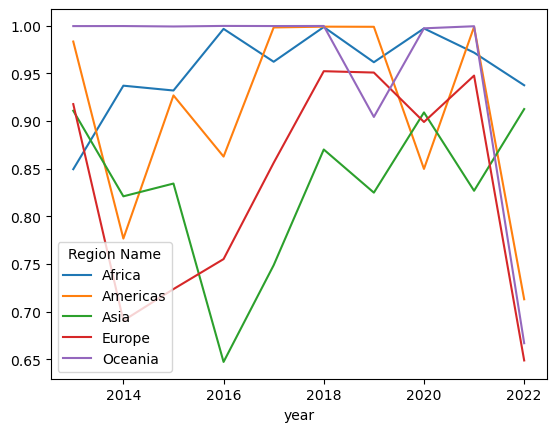

In [32]:
df1.groupby(['Region Name', 'year']).mean()['sentiment'].unstack(level=0).iloc[:,:10].plot()

# Dataset per paragraph of speech

## Loading the cleaned data

In [33]:
speeches2 = pd.read_parquet("https://github.com/Mlad-en/Intro_Data_Science/raw/main/cleaned_data/combined_data_2013_2022_per_paragraph.parquet")

In [34]:
speeches2

,country_name,iso_3,Region,corruption_sources,year,corruption_scores,corruption_standard_errors,global_score,fos_yearly_evolution,text_split
index,,,,,,,,,,
0,Afghanistan,AFG,AP,3.0,2013,8.0,3.0,62.64,0.00,Afghanistan. I therefore think that it is usef...
0,Afghanistan,AFG,AP,3.0,2013,8.0,3.0,62.64,0.00,I should like to share two contrasting picture...
0,Afghanistan,AFG,AP,3.0,2013,8.0,3.0,62.64,0.00,"States-led international military coalition, t..."
0,Afghanistan,AFG,AP,3.0,2013,8.0,3.0,62.64,0.00,Exploiting the vacuum and internal strife crea...
0,Afghanistan,AFG,AP,3.0,2013,8.0,3.0,62.64,0.00,Taliban regime until the 9/11 terrorist attack...
...,...,...,...,...,...,...,...,...,...,...
1941,Zambia,ZMB,SSA,9.0,2021,33.0,9.0,61.79,-1.21,"For us in Zambia, we will remain committed to ..."
1941,Zambia,ZMB,SSA,9.0,2021,33.0,9.0,61.79,-1.21,"Consistent with our commitment, Zambia is impl..."
1941,Zambia,ZMB,SSA,9.0,2021,33.0,9.0,61.79,-1.21,"In addition, Zambia emphasizes the importance ..."


## Combine with regions

In [35]:
df2 =  pd.merge(df_codes, speeches2, how="right", on="iso_3") 

In [36]:
df2

,Region Name,Sub-region Name,iso_3,country_name,Region,corruption_sources,year,corruption_scores,corruption_standard_errors,global_score,fos_yearly_evolution,text_split
0,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.00,Afghanistan. I therefore think that it is usef...
1,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.00,I should like to share two contrasting picture...
2,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.00,"States-led international military coalition, t..."
3,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.00,Exploiting the vacuum and internal strife crea...
4,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.00,Taliban regime until the 9/11 terrorist attack...
...,...,...,...,...,...,...,...,...,...,...,...,...
41304,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2021,33.0,9.0,61.79,-1.21,"For us in Zambia, we will remain committed to ..."
41305,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2021,33.0,9.0,61.79,-1.21,"Consistent with our commitment, Zambia is impl..."
41306,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2021,33.0,9.0,61.79,-1.21,"In addition, Zambia emphasizes the importance ..."
41307,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2021,33.0,9.0,61.79,-1.21,I wish to stress that the Government of the Re...


## Sentiment analyzer

### Drop None values of text

In [39]:
df2 = df2[df2['text_split'].notna()]

### Add sentiment score

In [40]:
df2['sentiment'] = [sia.polarity_scores(speech)['compound'] for speech in df2['text_split']]

C:\Users\easto\AppData\Local\Temp\ipykernel_8120\2217622538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sentiment'] = [sia.polarity_scores(speech)['compound'] for speech in df2['text_split']]


In [41]:
df2

,Region Name,Sub-region Name,iso_3,country_name,Region,corruption_sources,year,corruption_scores,corruption_standard_errors,global_score,fos_yearly_evolution,text_split,sentiment
0,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.00,Afghanistan. I therefore think that it is usef...,0.9803
1,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.00,I should like to share two contrasting picture...,0.5267
2,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.00,"States-led international military coalition, t...",-0.9716
3,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.00,Exploiting the vacuum and internal strife crea...,-0.9595
4,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.00,Taliban regime until the 9/11 terrorist attack...,-0.8225
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41304,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2021,33.0,9.0,61.79,-1.21,"For us in Zambia, we will remain committed to ...",0.9245
41305,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2021,33.0,9.0,61.79,-1.21,"Consistent with our commitment, Zambia is impl...",0.0000
41306,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2021,33.0,9.0,61.79,-1.21,"In addition, Zambia emphasizes the importance ...",0.9100
41307,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,9.0,2021,33.0,9.0,61.79,-1.21,I wish to stress that the Government of the Re...,0.7351


### Very small analysis

C:\Users\easto\AppData\Local\Temp\ipykernel_8120\2372745428.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby(['Region Name', 'year']).mean()['sentiment'].unstack(level=0).iloc[:,:10].plot()


<Axes: xlabel='year'>

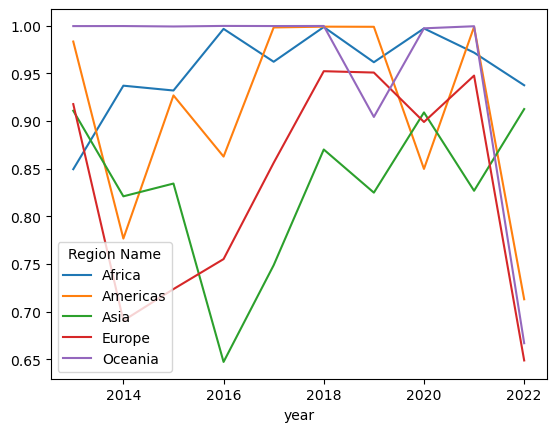

In [42]:
df1.groupby(['Region Name', 'year']).mean()['sentiment'].unstack(level=0).iloc[:,:10].plot()

# Save dataframes

In [44]:
df1.to_parquet('Sentiment_data.parquet')

In [45]:
df2.to_parquet('Sentiment_data_per_paragraph.parquet')